In [161]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [164]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report

In [165]:
dftrain = pd.read_csv("/loan-train.csv")
dftest = pd.read_csv("/loan-test.csv")
df = pd.concat([dftrain,dftest],ignore_index=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [166]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [168]:
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [169]:
df.drop(["Loan_ID"],axis=1,inplace=True)

In [170]:
obj = ["Gender","Married","Dependents","Self_Employed","Loan_Amount_Term","Credit_History","Loan_Status"]
for i in obj:
  df[i]=df[i].fillna(df[i].mode()[0])
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [171]:
le = LabelEncoder()
obj = ["Loan_Status","Property_Area","Self_Employed","Education","Dependents","Married","Gender"]  
for i in obj:
  df[i]=le.fit_transform(df[i])
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

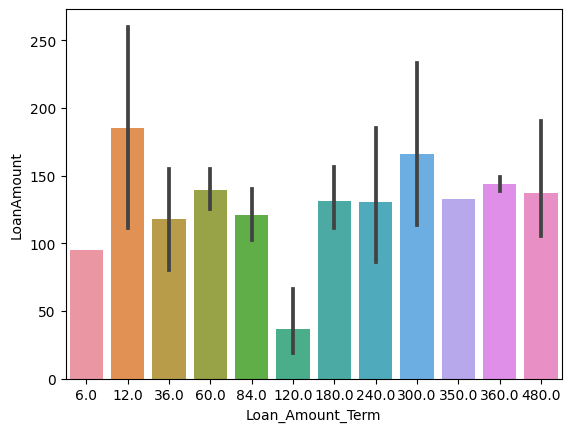

In [172]:
sns.barplot(x = df['Loan_Amount_Term'], y = df['LoanAmount'])

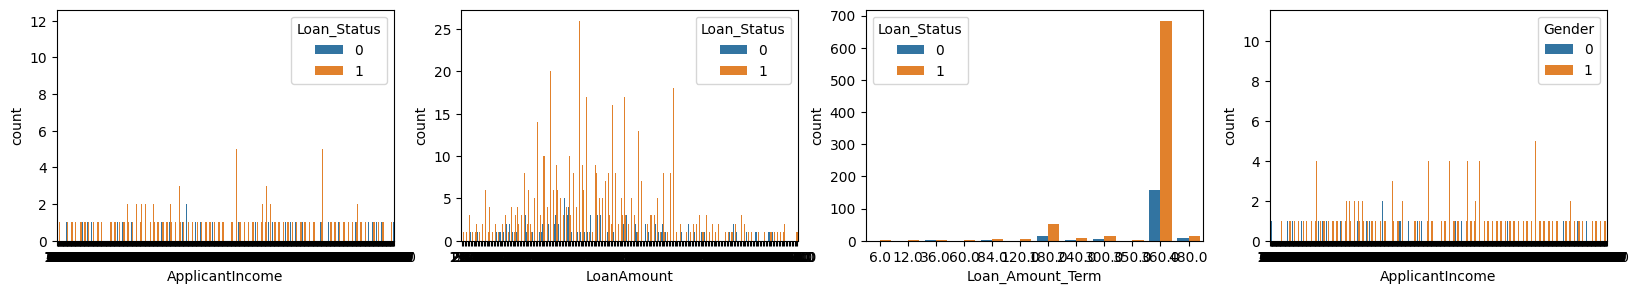

In [173]:
fig,plot = plt.subplots(figsize = (20,3),ncols=4)
sns.countplot(x = df['ApplicantIncome'], hue = df['Loan_Status'],fill = True ,ax = plot[0])
sns.countplot(x = df['LoanAmount'], hue = df['Loan_Status'], fill = True ,ax = plot[1])
sns.countplot(x = df['Loan_Amount_Term'], hue = df['Loan_Status'], fill = True ,ax = plot[2])
sns.countplot(x = df['ApplicantIncome'], hue = df['Gender'], fill = True ,ax = plot[3])
plt.show()


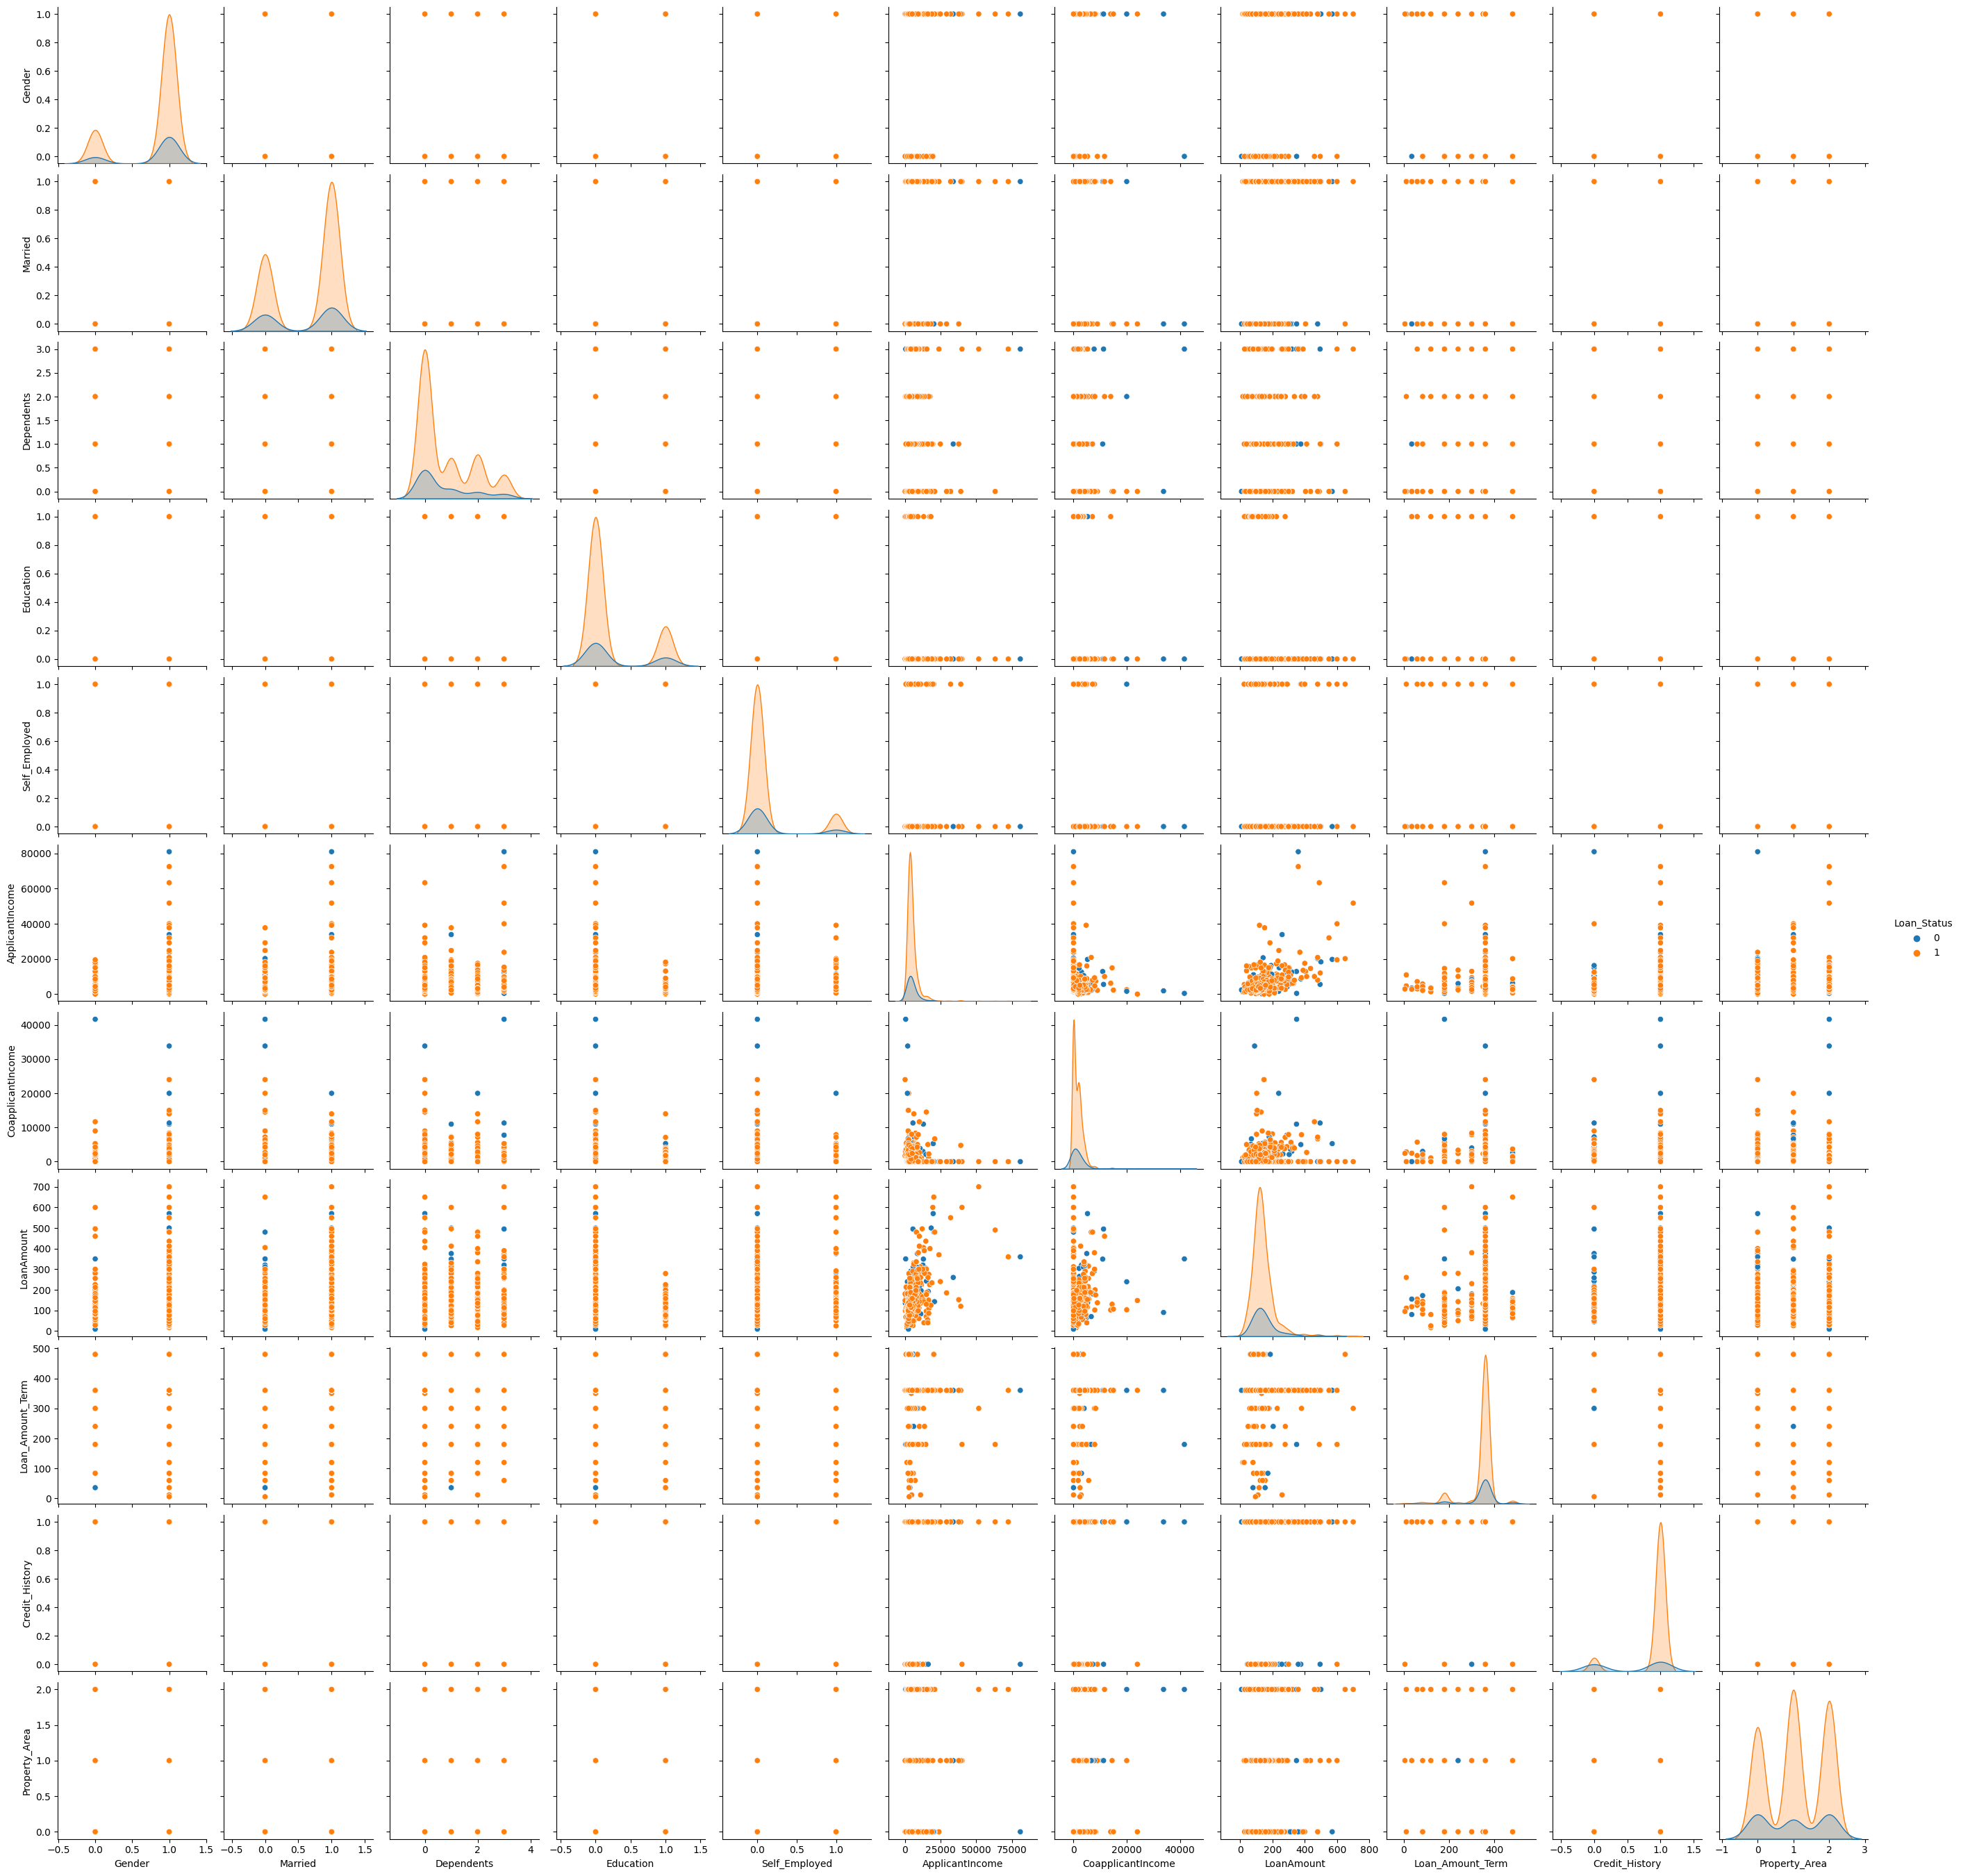

In [174]:
sns.pairplot(df, hue = 'Loan_Status')

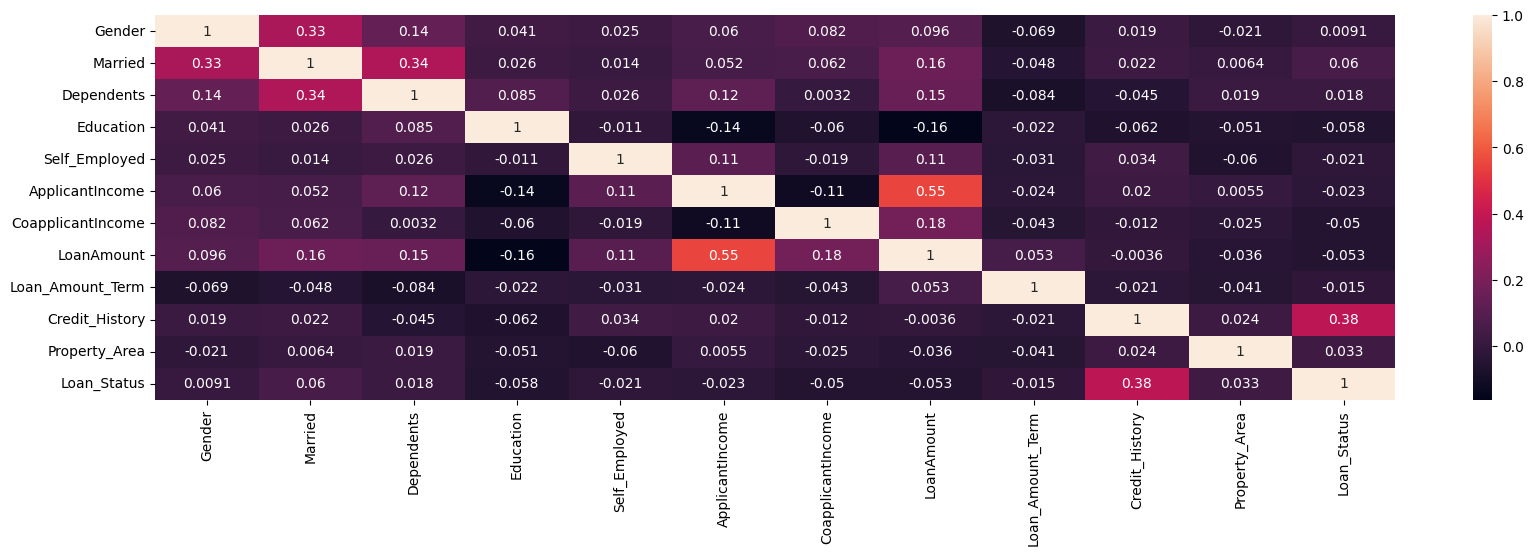

In [175]:
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(), annot = True)
plt.show()


In [176]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


scaling

In [177]:
minmax = MinMaxScaler()
X=minmax.fit_transform(X)
X

array([[1.        , 0.        , 0.        , ..., 0.74683544, 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.74683544, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.74683544, 1.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.74683544, 1.        ,
        0.5       ],
       [1.        , 1.        , 0.        , ..., 0.74683544, 1.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.36708861, 1.        ,
        0.        ]])

In [178]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=1)

**PCA** **method**

In [179]:
pca = PCA(n_components=11)
Xtrain_p = pca.fit_transform(Xtrain)
Xtest_p=pca.transform(Xtest)
pca.explained_variance_ratio_

array([0.24972013, 0.16479354, 0.14641181, 0.11513642, 0.10889842,
       0.09836472, 0.08277748, 0.01563068, 0.01225516, 0.00402779,
       0.00198385])

####################################################################################################
KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.59      0.33      0.43        57
           1       0.86      0.95      0.90       238

    accuracy                           0.83       295
   macro avg       0.72      0.64      0.66       295
weighted avg       0.80      0.83      0.81       295

Accuracy score : 82.71186440677965
####################################################################################################
####################################################################################################
SVC()
              precision    recall  f1-score   support

           0       0.55      0.28      0.37        57
           1       0.85      0.95      0.89       238

    accuracy                           0.82       295
   macro avg       0.70      0.61      0.63       295
weighted avg       0.79      0.82 

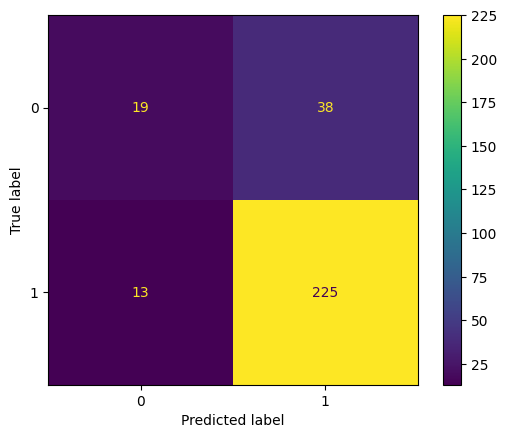

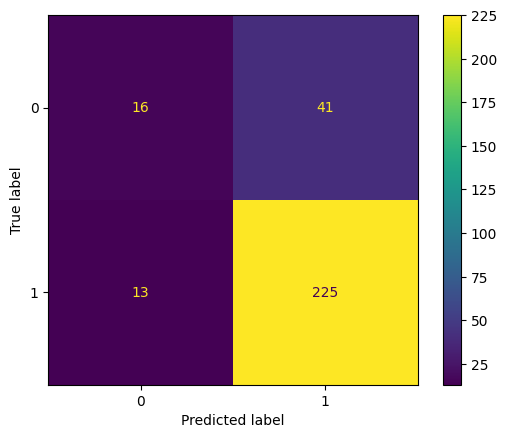

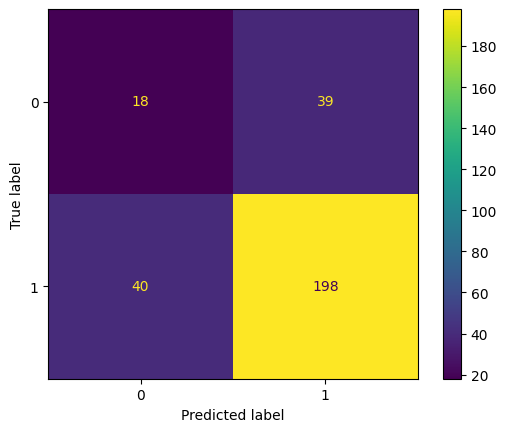

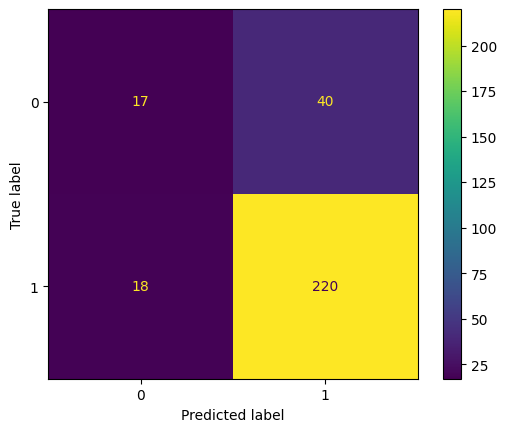

In [180]:
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
obj=[knn,svm,dt,rf]
for i in obj:
  i.fit(Xtrain_p,ytrain)
  y_pred = i.predict(Xtest_p)
  print("#"*100)
  print(i)
  print(ConfusionMatrixDisplay.from_predictions(ytest,y_pred))
  print(classification_report(ytest,y_pred))
  print("Accuracy score :",accuracy_score(ytest,y_pred)*100)
  print("#"*100)

**feature selection method**

In [244]:
chi2_features = SelectKBest(chi2,k=10)   #trying different values for k we will get variations in accuracy ,max value for  is 11
select=chi2_features.fit(X,y)
s=select.scores_
s

array([1.51241363e-02, 1.23137701e+00, 1.53003954e-01, 2.53849810e+00,
       3.91908570e-01, 4.03443362e-02, 2.72230084e-01, 1.74435136e-01,
       5.97224095e-03, 2.14495231e+01, 3.18493516e-01])

In [231]:
col=df.iloc[:,:-1]
col.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [232]:
df1 = pd.DataFrame(col.columns,columns=["attributes"])
df1
df1["score"]=s
df1.sort_values(by="score",ascending = False)

,attributes,score
9,Credit_History,21.449523
3,Education,2.538498
1,Married,1.231377
4,Self_Employed,0.391909
10,Property_Area,0.318494
6,CoapplicantIncome,0.272230
7,LoanAmount,0.174435
2,Dependents,0.153004
5,ApplicantIncome,0.040344
0,Gender,0.015124


In [245]:
x_new = select.fit_transform(X,y)

In [246]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X_new,y,test_size=0.3,random_state=1)

####################################################################################################
KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.59      0.33      0.43        57
           1       0.86      0.95      0.90       238

    accuracy                           0.83       295
   macro avg       0.72      0.64      0.66       295
weighted avg       0.80      0.83      0.81       295

Accuracy score : 82.71186440677965
####################################################################################################
####################################################################################################
SVC()
              precision    recall  f1-score   support

           0       0.57      0.35      0.43        57
           1       0.86      0.94      0.90       238

    accuracy                           0.82       295
   macro avg       0.71      0.64      0.67       295
weighted avg       0.80      0.82 

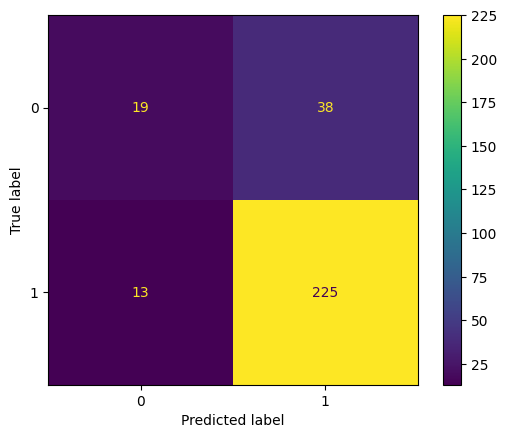

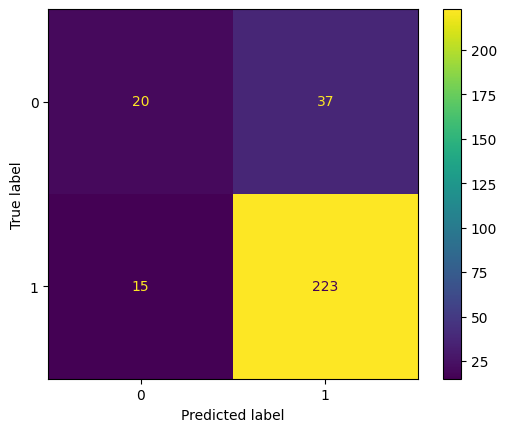

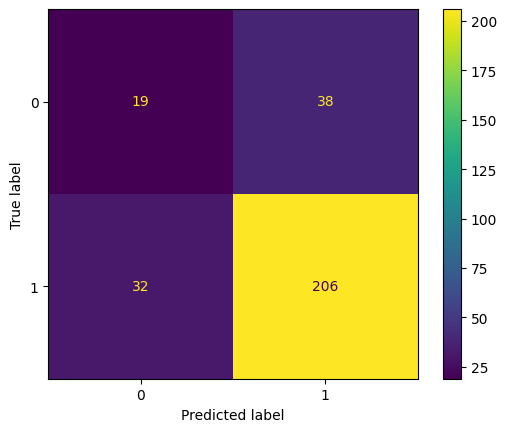

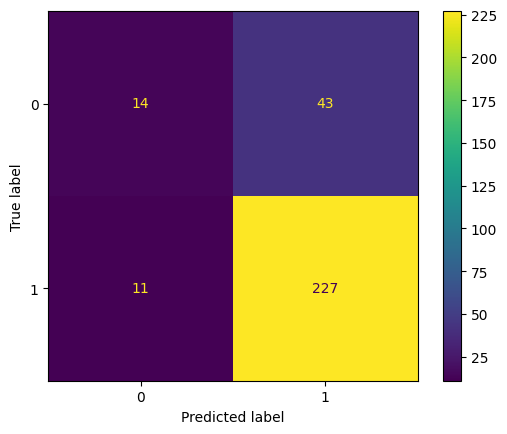

In [248]:
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
obj=[knn,svm,dt,rf]
for i in obj:
  i.fit(Xtrain,ytrain)
  y_pred = i.predict(Xtest)
  print("#"*100)
  print(i)
  print(ConfusionMatrixDisplay.from_predictions(ytest,y_pred))
  print(classification_report(ytest,y_pred))
  print("Accuracy score :",accuracy_score(ytest,y_pred)*100)
  print("#"*100)

In [ ]:
#after selecting best 10 features kneighbors classifier gives highest accuracy of 83% than other 